In [2]:
##HERE WE ANALYZE THE METAGENOMES NOT THE ENRICHED SEQUENCES
#to make later the plots we append the original seq to the metagenomes and we have the enriched seqs

import pandas as pd

mmseqres=pd.read_csv('taxonomyResult2.tsv',sep='\t',header=None,names=['TaxID','dunno','rank','final_rank_name','lineage'])
mmseqres

,TaxID,dunno,rank,final_rank_name,lineage
0,Ga0116815_10394881,10662,family,Myoviridae,d_Viruses;-_Duplodnaviria;-_Heunggongvirae;p_U...
1,Ga0116815_10421482,1871086,species,Brevundimonas sp.,-_cellular organisms;d_Bacteria;p_Proteobacter...
2,Ga0116815_10449072,1883368,species,Synechococcus phage S-CAM7,d_Viruses;-_Duplodnaviria;-_Heunggongvirae;p_U...
3,Ga0116815_10470351,555387,species,Synechococcus phage S-RSM4,d_Viruses;-_Duplodnaviria;-_Heunggongvirae;p_U...
4,Ga0116815_10506812,2023996,no rank,Synechococcus phage Bellamy,d_Viruses;-_Duplodnaviria;-_Heunggongvirae;p_U...
...,...,...,...,...,...
1064772,Ga0070743_10000001108,1,no rank,root,-_root
1064773,Ga0066378_100707832,1869227,species,bacterium,-_cellular organisms;d_Bacteria;-_unclassified...
1064774,Ga0007813_10392031,2100421,species,uncultured Caudovirales phage,d_Viruses;-_Duplodnaviria;-_Heunggongvirae;p_U...
1064775,Ga0007813_10960961,2100421,species,uncultured Caudovirales phage,d_Viruses;-_Duplodnaviria;-_Heunggongvirae;p_U...


In [3]:
## this dataframe will be for viruses
lineage_en=mmseqres[['TaxID','lineage']]
lin2=lineage_en
lin2=lin2.replace(';', ' ', regex=True)
# Extract every taxon from the string  
lin2['viruses'] = lin2['lineage'].str.extract('(d_Viruses)', expand=True) 
lin2['realm'] = lin2['lineage'].str.extract('(\w*viria)', expand=True) 
lin2['kingdom'] = lin2['lineage'].str.extract('(\w*virae)', expand=True) 
lin2['phylum'] = lin2['lineage'].str.extract('(\w*viricota)', expand=True) 
lin2['clas'] = lin2['lineage'].str.extract('(\w*viricetes)', expand=True) 
lin2['order'] = lin2['lineage'].str.extract('(\w*virales)', expand=True) 
lin2['family'] = lin2['lineage'].str.extract('(\w*viridae)', expand=True) 
lin2['subfamily'] = lin2['lineage'].str.extract('(\w*virinae)', expand=True) 
lin2['genus'] = lin2['lineage'].str.extract('(\w*virus\s)', expand=True) 
vir=lin2.loc[lin2['viruses'] == 'd_Viruses']
vir=vir.drop(columns=['lineage','viruses'])
vir

,TaxID,realm,kingdom,phylum,clas,order,family,subfamily,genus
0,Ga0116815_10394881,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,f_Myoviridae,NaN,NaN
2,Ga0116815_10449072,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,f_Myoviridae,NaN,NaN
3,Ga0116815_10470351,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,f_Myoviridae,NaN,g_Cymopoleiavirus
4,Ga0116815_10506812,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,f_Myoviridae,NaN,g_Bellamyvirus
5,Ga0116815_10532041,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,f_Myoviridae,NaN,g_Tefnutvirus
...,...,...,...,...,...,...,...,...,...
1064766,Ga0079957_100009892,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,NaN,NaN,NaN
1064770,Ga0079957_10540294,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,f_Myoviridae,NaN,NaN
1064774,Ga0007813_10392031,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,NaN,NaN,NaN
1064775,Ga0007813_10960961,_Duplodnaviria,_Heunggongvirae,p_Uroviricota,c_Caudoviricetes,o_Caudovirales,NaN,NaN,NaN


In [4]:
#this df will be for bacteria
lineage_en=mmseqres[['TaxID','lineage']]
lin=lineage_en
lin=lin.replace(';', ' ', regex=True)
# Extract every taxon from the string  
lin['bacteria'] = lin['lineage'].str.extract('(d_Bacteria)', expand=True) 
lin['phylum'] = lin['lineage'].str.extract('(p_\w*ia)', expand=True) 
lin['clas'] = lin['lineage'].str.extract('(c_\w*ia)', expand=True) 
lin['order'] = lin['lineage'].str.extract('(o_\w*ales)', expand=True) 
lin['family'] = lin['lineage'].str.extract('(f_\w*aceae)', expand=True) 
lin['genus'] = lin['lineage'].str.extract('(g_\w*ae)', expand=True) 
bac=lin.loc[lin['bacteria'] == 'd_Bacteria']
bac=bac.drop(columns=['lineage','bacteria'])
bac=bac.rename(columns={'TaxID':'proteinID'})
bac_drop=bac.drop_duplicates(subset='proteinID',keep=False)
#bac_drop.to_csv('back_drop.csv',header=True,index=False,sep='\t')
bac_drop

,proteinID,phylum,clas,order,family,genus
1,Ga0116815_10421482,p_Proteobacteria,c_Alphaproteobacteria,o_Caulobacterales,f_Caulobacteraceae,NaN
11,SRS063287_LANL_scaffold_18792__gene_19547,NaN,NaN,NaN,NaN,NaN
12,SRS014979_WUGC_scaffold_5521__gene_10504,NaN,NaN,NaN,NaN,NaN
13,C2384937__gene_156734,p_Proteobacteria,c_Gammaproteobacteria,o_Enterobacterales,f_Enterobacteriaceae,NaN
15,C3949249__gene_161684,NaN,NaN,o_Bacillales,NaN,NaN
...,...,...,...,...,...,...
1064767,Ga0079957_100020621,NaN,c_Saprospiria,o_Saprospirales,NaN,NaN
1064768,Ga0079957_10494512,NaN,c_Flavobacteriia,o_Flavobacteriales,f_Crocinitomicaceae,NaN
1064769,Ga0079957_10516423,p_Proteobacteria,c_Alphaproteobacteria,o_Rhodospirillales,f_Rhodospirillaceae,NaN
1064771,Ga0073913_100427231,p_Proteobacteria,c_Gammaproteobacteria,NaN,NaN,NaN


In [5]:
#make the connection with families
#taken from the file enrichment hits all
fam_tax=pd.read_csv('fam_tax.csv',sep='\t',header=0,names=['family','proteinID'])
fam_tax

,family,proteinID
0,636,2001223373
1,774,2001244859
2,774,2001252294
3,1045,2001266549
4,1032,2001266902
...,...,...
1230296,1045,C309622__gene_9571
1230297,598,SRS015381_WUGC_scaffold_18523__gene_7165
1230298,721,C482073__gene_18598
1230299,99,C484447__gene_20057


In [6]:
final_bac_orig=fam_tax[['proteinID']].join(bac_drop.set_index('proteinID'), on='proteinID')
#bac_all=bac_all.sort_values(by='family_x',ignore_index=True)
cluster=fam_tax['family']
#reorder columns
final_bac_orig.insert(0, 'cluster family', cluster)
final_bac_orig

,cluster family,proteinID,phylum,clas,order,family,genus
0,636,2001223373,p_Proteobacteria,c_Alphaproteobacteria,o_Sphingomonadales,f_Sphingomonadaceae,NaN
1,774,2001244859,p_Proteobacteria,c_Betaproteobacteria,NaN,NaN,NaN
2,774,2001252294,p_Proteobacteria,c_Deltaproteobacteria,o_Myxococcales,f_Sandaracinaceae,NaN
3,1045,2001266549,NaN,NaN,NaN,NaN,NaN
4,1032,2001266902,p_Actinobacteria,c_Actinobacteria,o_Pseudonocardiales,f_Pseudonocardiaceae,NaN
...,...,...,...,...,...,...,...
1230296,1045,C309622__gene_9571,NaN,NaN,o_Bacillales,f_Staphylococcaceae,NaN
1230297,598,SRS015381_WUGC_scaffold_18523__gene_7165,NaN,NaN,o_Bacillales,f_Staphylococcaceae,NaN
1230298,721,C482073__gene_18598,p_Actinobacteria,c_Actinobacteria,NaN,NaN,NaN
1230299,99,C484447__gene_20057,p_Proteobacteria,c_Gammaproteobacteria,o_Pasteurellales,f_Pasteurellaceae,g_Hae


In [7]:
#make the same table for viruses
vir=vir.rename(columns={'TaxID':'proteinID'})
vir_drop=vir.drop_duplicates(subset='proteinID',keep=False)


In [8]:
final_vir=fam_tax[['proteinID']].join(vir_drop.set_index('proteinID'), on='proteinID')
cluster=fam_tax['family']
#reorder columns
final_vir.insert(0, 'cluster_family', cluster)
final_vir

,cluster_family,proteinID,realm,kingdom,phylum,clas,order,family,subfamily,genus
0,636,2001223373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,774,2001244859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,774,2001252294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1045,2001266549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1032,2001266902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1230296,1045,C309622__gene_9571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1230297,598,SRS015381_WUGC_scaffold_18523__gene_7165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1230298,721,C482073__gene_18598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1230299,99,C484447__gene_20057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## there are many lineages left blank on final bac dataframe
final_bac1 = final_bac_orig[final_bac_orig['genus'].notna()]
final_bac2 = final_bac_orig[final_bac_orig['family'].notna()]
final_bac1.to_csv('final_bac0.csv',header=True,sep='\t',index=True)
final_bac2.to_csv('final_bac1.csv',header=True,sep='\t',index=True)

#concatenate the two dataframes
final_bac=pd.concat([final_bac2,final_bac1],ignore_index=True,copy=False)
#drop double rows
final_bac=final_bac.drop_duplicates()
#final_bac.to_csv('final_bac3.csv',header=True,sep='\t',index=True)
final_bac

,cluster family,proteinID,phylum,clas,order,family,genus
0,636,2001223373,p_Proteobacteria,c_Alphaproteobacteria,o_Sphingomonadales,f_Sphingomonadaceae,NaN
1,774,2001252294,p_Proteobacteria,c_Deltaproteobacteria,o_Myxococcales,f_Sandaracinaceae,NaN
2,1032,2001266902,p_Actinobacteria,c_Actinobacteria,o_Pseudonocardiales,f_Pseudonocardiaceae,NaN
3,438,2001357359,p_Proteobacteria,c_Gammaproteobacteria,o_Enterobacterales,f_Yersiniaceae,NaN
4,633,2001415824,p_Proteobacteria,c_Gammaproteobacteria,o_Alteromonadales,f_Pseudoalteromonadaceae,NaN
...,...,...,...,...,...,...,...
285207,636,Ga0182021_115537281,p_Verrucomicrobia,c_Verrucomicrobia,o_Verrucomicrobiales,NaN,g_Pedosphae
285259,636,Ga0181522_105481162,p_Verrucomicrobia,c_Verrucomicrobia,o_Verrucomicrobiales,NaN,g_Pedosphae
285283,636,Ga0134404_1000389,NaN,c_Bacteroidia,o_Bacteroidales,NaN,g_Phocae
285333,636,Ga0167340_10023058,NaN,c_Bacteroidia,o_Bacteroidales,NaN,g_Phocae


In [10]:
#remove blank lines
final_vir1 = final_vir[final_vir['genus'].notna()]
final_vir2 = final_vir[final_vir['family'].notna()]

#concatenate the two dataframes
final_vir=pd.concat([final_vir2,final_vir1],ignore_index=True,copy=False)
#drop double rows
final_vir=final_vir.drop_duplicates()


In [11]:
#remove the special prefixes from lineage (bac)
final_bac['phylum']=final_bac['phylum'].str.strip('p_')
final_bac['clas']=final_bac['clas'].str.strip('c_')
final_bac['order']=final_bac['order'].str.strip('o_')
final_bac['family']=final_bac['family'].str.strip('f_')
final_bac['genus']=final_bac['genus'].str.strip('g_')
final_bac.to_csv('final_bac3.csv',header=True,sep='\t',index=True)

In [12]:
#remove the special prefixes from lineage (var)
final_bac=final_vir
final_bac['phylum']=final_bac['phylum'].str.strip('p_')
final_bac['kingdom']=final_bac['kingdom'].str.strip('k_')
final_bac['kingdom']=final_bac['kingdom'].str.strip('_')
final_bac['realm']=final_bac['realm'].str.strip('_')
final_bac['clas']=final_bac['clas'].str.strip('c_')
final_bac['order']=final_bac['order'].str.strip('o_')
final_bac['family']=final_bac['family'].str.strip('f_')
final_bac['genus']=final_bac['genus'].str.strip('g_')
final_bac['subfamily']=final_bac['subfamily'].str.strip('_')

final_vir=final_bac
final_vir.to_csv('final_vir3.csv',header=True,sep='\t',index=True)
final_bac=pd.read_csv('final_bac3.csv',header=0,sep='\t',index_col=0)

In [13]:
final_vir

,cluster_family,proteinID,realm,kingdom,phylum,clas,order,family,subfamily,genus
0,156,2007084508,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
1,103,2014618295,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
2,893,2014619696,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
3,177,2014619696,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
4,336,2014621216,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
482868,72,Ga0181841_100888141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus
482870,527,Ga0181833_100037825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus
482908,55,Ga0181831_1000288822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus
482976,55,Ga0181831_101323411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus


In [14]:
final_bac

,cluster family,proteinID,phylum,clas,order,family,genus
0,636,2001223373,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,NaN
1,774,2001252294,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NaN
2,1032,2001266902,Actinobacteria,Actinobacteria,Pseudonocardiales,Pseudonocardiaceae,NaN
3,438,2001357359,Proteobacteria,Gammaproteobacteria,Enterobacterales,Yersiniaceae,NaN
4,633,2001415824,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,NaN
...,...,...,...,...,...,...,...
285207,636,Ga0182021_115537281,Verrucomicrobia,Verrucomicrobia,Verrucomicrobiales,NaN,Pedosphae
285259,636,Ga0181522_105481162,Verrucomicrobia,Verrucomicrobia,Verrucomicrobiales,NaN,Pedosphae
285283,636,Ga0134404_1000389,NaN,Bacteroidia,Bacteroidales,NaN,Phocae
285333,636,Ga0167340_10023058,NaN,Bacteroidia,Bacteroidales,NaN,Phocae


In [15]:
final_vir

,cluster_family,proteinID,realm,kingdom,phylum,clas,order,family,subfamily,genus
0,156,2007084508,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
1,103,2014618295,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
2,893,2014619696,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
3,177,2014619696,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
4,336,2014621216,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
482868,72,Ga0181841_100888141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus
482870,527,Ga0181833_100037825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus
482908,55,Ga0181831_1000288822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus
482976,55,Ga0181831_101323411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,virus


In [16]:
##merge the TAXIDS of the metagenomes
# and then append with the original taxids from previous notebook

##some CODE TAKEN FROM PREVIOUS NOTEBOOK
from collections import Counter

protID_taxID=pd.read_csv('proteinID_taxID.csv',sep='\t',header=None,names=['proteinID','taxID'])
#merge with final bac
final_bac_tax=pd.merge(final_bac,protID_taxID,on="proteinID")
#reorder the columns
final_bac_tax=final_bac_tax[['taxID','cluster family','proteinID','phylum','clas','order','family','genus']]


#count the frequency of taxid values
dict=Counter(final_bac_tax['taxID'])
df=pd.DataFrame.from_dict(dict,orient='index').reset_index()
df=df.rename(columns={'index':'taxid',0:'frequency'})

#lets say that we want to get the families(or any rank) of these taxids
#this is the taxid list
mytaxids=df['taxid'].tolist()

#get ncbi library to translate taxids into taxonomy ranks
import csv
from ete3 import NCBITaxa
ncbi=NCBITaxa()

final_bac_tax=final_bac_tax.fillna(0)
final_bac_tax

,taxID,cluster family,proteinID,phylum,clas,order,family,genus
0,1176646,636,2001223373,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,0
1,927083,774,2001252294,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,0
2,418495,1032,2001266902,Actinobacteria,Actinobacteria,Pseudonocardiales,Pseudonocardiaceae,0
3,28152,438,2001357359,Proteobacteria,Gammaproteobacteria,Enterobacterales,Yersiniaceae,0
4,194690,633,2001415824,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,0
...,...,...,...,...,...,...,...,...
279439,320771,636,Ga0182021_115537281,Verrucomicrobia,Verrucomicrobia,Verrucomicrobiales,0,Pedosphae
279440,320771,636,Ga0181522_105481162,Verrucomicrobia,Verrucomicrobia,Verrucomicrobiales,0,Pedosphae
279441,821,636,Ga0134404_1000389,0,Bacteroidia,Bacteroidales,0,Phocae
279442,732242,636,Ga0167340_10023058,0,Bacteroidia,Bacteroidales,0,Phocae


In [17]:
#create a taxid list for viral dataset
#merge with final bac
final_vir_tax=pd.merge(final_vir,protID_taxID,on="proteinID")
#reorder the columns
final_vir_tax=final_vir_tax[['taxID','cluster_family','proteinID','phylum','clas','order','family','genus']]
#count the frequency of taxid values
dict=Counter(final_vir_tax['taxID'])
df=pd.DataFrame.from_dict(dict,orient='index').reset_index()
df=df.rename(columns={'index':'taxid',0:'frequency'})

#lets say that we want to get the families(or any rank) of these taxids
#this is the taxid list
mytaxids_vir=df['taxid'].tolist()
final_vir_tax=final_vir_tax.fillna(0)
final_vir_tax

,taxID,cluster_family,proteinID,phylum,clas,order,family,genus
0,2606591,156,2007084508,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,0
1,2733136,103,2014618295,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,0
2,2733129,893,2014619696,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,0
3,2733129,177,2014619696,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,0
4,196896,336,2014621216,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,0
...,...,...,...,...,...,...,...,...
313846,2591644,72,Ga0181841_100888141,0,0,0,0,virus
313847,2591644,527,Ga0181833_100037825,0,0,0,0,virus
313848,2591644,55,Ga0181831_1000288822,0,0,0,0,virus
313849,2591644,55,Ga0181831_101323411,0,0,0,0,virus


In [18]:
#IMPORT ORIGINAL FAMILIES TO MAKE A DODGED BARPLOT
import pandas as pd
from collections import Counter
#apo to arxeio viral20 pernoyme tis 2 protes sthles
clust_prot=pd.read_csv("cluster_id_protein_name.csv",sep="\t",header=None,names=['cluster_id','protein_name'])
#we have taken the taxids assigned to each protein name from ViralProt.csv
prot_tax=pd.read_csv("protein_name_taxid.csv",sep="\t",header=None,names=['protein_name','taxid'])
#we take the clust_prot table and assign to it the taxid column from prot_tax table, 
#new columns: cluster_id,protein_name,taxid
hor_stack=pd.merge(clust_prot,prot_tax,on="protein_name")
hor_stack=hor_stack.drop(columns=["protein_name"])
#sort by taxid
sortbytaxid=hor_stack.sort_values('taxid',ascending=False)
# Group tax id by cluster id
df_grped = sortbytaxid.groupby('taxid')['cluster_id'].apply(list).reset_index()
dict=Counter(sortbytaxid['taxid'])
df=pd.DataFrame.from_dict(dict,orient='index').reset_index()
df=df.rename(columns={'index':'taxid',0:'frequency'})
#here, we will try to translate taxids into ranks so that our diagram has a better meaning
#we will take the ncbi library for help
import csv
from ete3 import NCBITaxa
ncbi=NCBITaxa()

##from a function we will make the diagram 
def taxid_list2plot(df,rank='family'):
    #lets say that we want to get the families(or any rank) of these taxids
    #this is the list of unique taxids
    mytaxids=df['taxid'].tolist()
    ## WE CAN CHOOSE WHATEVER TAXONOMY RANK WE LIKE
    ## px se epipedo)(rank) family
    families=[]
    false_taxids=[]
    for taxid in mytaxids:
        lineage = ncbi.get_lineage(taxid)
        lineage2ranks = ncbi.get_rank(lineage)
        if rank not in lineage2ranks.values():
            false_taxids.append(taxid)
        for key, value in lineage2ranks.items(): 
            if value == rank:
                families.append(key)
    #remove items that have not families
    for taxid in false_taxids:
        mytaxids.remove(taxid)
    ranks=[]
    for taxid in families:
        key,value=list(ncbi.get_taxid_translator([taxid]).items())[0]
        ranks.append(value)
    #write myfamilies list in a txt file
    with open('%s_original.txt'%rank, 'w') as f:
        for item in ranks:
            f.write("%s\n" % item)
    families_frequency=Counter(families)
    #now we will make a better diagram
    families_df=pd.DataFrame.from_dict(families_frequency,orient='index').reset_index()
    families_df=families_df.rename(columns={'index':'family_rank',0:'frequency'})
    family_dict={}
    fam_rank=families_df['family_rank'].tolist()
    for fam in fam_rank:
        family_dict.update(ncbi.get_taxid_translator([fam]))
    families_df['family_rank']=family_dict.values()
    families_df=families_df.sort_values(by=['frequency'],ascending=False,ignore_index=True)
    return families_df
myplot=taxid_list2plot(df,rank='order')
myplot

,family_rank,frequency
0,Caudovirales,1907
1,Geplafuvirales,469
2,Rowavirales,57
3,Chitovirales,48
4,Patatavirales,25
5,Pimascovirales,16
6,Algavirales,6
7,Imitervirales,3
8,Zurhausenvirales,1


In [19]:
#can we make a function that gives as output the plot?
#YESS
## WE CAN CHOOSE WHATEVER TAXONOMY RANK WE LIKE
## px se epipedo family
## 1.prosoxh sto input my taxid
## 2. ftia3e function poy na dinei to swsto original rank.txt
def taxid_list2freq(taxidlist,df,rank_orig='families_original.txt',rank='family',less=True,threshold=150):
    # we dont use ncbi here since we have the lineage used from mmseqs
    ## we can use whatever rank we want for our plot
    families=[]
    false_taxids=[]
    for taxid in taxidlist:
        level=df.loc[df['taxID']==taxid][rank].tolist()[0]
        if level==0:
            #taxids that do not contain the taxonomy rank 
            false_taxids.append(taxid)
        else:
            families.append(level)
    #append to metagenome families the enriched families
    f=open(rank_orig,'r')
    cont=f.read()
    orig_fam=cont.split('\n')
    f.close()
    enriched_families=[]
    import itertools
    for i in itertools.chain(orig_fam,families):
        enriched_families.append(i)
     ##now we will count the frequencies for the enriched families
    families_frequency=Counter(enriched_families)
    families_df=pd.DataFrame.from_dict(families_frequency,orient='index').reset_index()
    families_df=families_df.rename(columns={'index':'family_rank',0:'frequency'})
    families_df=families_df.sort_values(by=['frequency'],ascending=False)
    #because we have 419 unique families we will keep only those with high frequency (in above ten clusters/families )
    if less==True:
        less_families=families_df.loc[families_df['frequency']>=threshold]
    else:
        less_families=families_df
    return less_families

In [20]:
levels=['order']
for i in levels:
    less_families=taxid_list2freq(mytaxids_vir,final_vir_tax,less=False,rank_orig='{0}_original.txt'.format(i),rank=i,threshold=20)
dodged=pd.merge(less_families,myplot,how='outer')
dodged

,family_rank,frequency
0,Caudovirales,3804
1,Geplafuvirales,471
2,Chitovirales,66
3,Rowavirales,58
4,Algavirales,53
5,Patatavirales,34
6,Pimascovirales,29
7,Imitervirales,17
8,Amarillovirales,2
9,Zurhausenvirales,1


<Figure size 640x480 with 0 Axes>

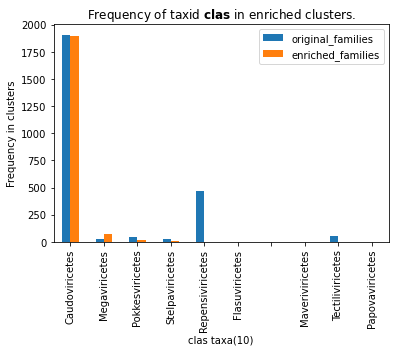

In [21]:
#make the enriched plots for different taxon levels
#for genus, family, subfamily, order, class, phylum 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#we are adjusting this one
levels=['clas']
for i in levels:
    less=False
    threshold=20
    #in all ranks except genus we use less=False
    less_families=taxid_list2freq(mytaxids_vir,final_vir_tax,less=False,rank_orig='{0}_original.txt'.format(i),rank=i,threshold=20)
    less_families=less_families.rename(columns={'frequency':'enriched_families'})
    
    myplot=taxid_list2plot(df,rank='class')
    myplot=myplot.rename(columns={'frequency':'original_families'})
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    dodged=pd.merge(less_families,myplot,how='outer')
    dodged.plot(x="family_rank", y=["original_families", "enriched_families"], kind="bar")
    #ax1=less_families.plot.bar(x='family_rank', y='frequency',alpha=0.5)
    #ax1.get_legend().remove()
    length=len(dodged.index)
    plt.xlabel('{0} taxa({1})'.format(i,length))
    plt.ylabel("Frequency in clusters")
    if less==True:
        plt.title("Frequency of taxid "+r"$\bf{"+str(i)+"}$"+" in enriched clusters."+'Applied threshold: '+"in over %s families" %threshold)
    else:
         plt.title("Frequency of taxid "+r"$\bf{"+str(i)+"}$"+" in enriched clusters.")
    plt.savefig("%sVsClusters_enriched.png"%i,bbox_inches='tight')


In [22]:
less_families['family_rank'].tolist()

['Caudoviricetes',
 'Megaviricetes',
 'Pokkesviricetes',
 'Stelpaviricetes',
 'Repensiviricetes',
 'Flasuviricetes',
 '',
 'Maveriviricetes',
 'Tectiliviricetes']

In [23]:
#preparation to import the original families
df=pd.read_csv('original_df.csv',sep='\t',header=0,index_col=0)
#import from previous notebook
##from a function we will make the diagram 
def taxid_list2plot(df,rank='family'):
    #lets say that we want to get the families(or any rank) of these taxids
    #this is the list of unique taxids
    mytaxids=df['taxid'].tolist()
    ## WE CAN CHOOSE WHATEVER TAXONOMY RANK WE LIKE
    ## px se epipedo)(rank) family
    families=[]
    false_taxids=[]
    for taxid in mytaxids:
        lineage = ncbi.get_lineage(taxid)
        lineage2ranks = ncbi.get_rank(lineage)
        if rank not in lineage2ranks.values():
            false_taxids.append(taxid)
        for key, value in lineage2ranks.items(): 
            if value == rank:
                families.append(key)
    #remove items that have not families
    for taxid in false_taxids:
        mytaxids.remove(taxid)
    ranks=[]
    for taxid in families:
        key,value=list(ncbi.get_taxid_translator([taxid]).items())[0]
        ranks.append(value)
    #write myfamilies list in a txt file
    with open('%s_original.txt'%rank, 'w') as f:
        for item in ranks:
            f.write("%s\n" % item)
    families_frequency=Counter(families)
    #now we will make a better diagram
    families_df=pd.DataFrame.from_dict(families_frequency,orient='index').reset_index()
    families_df=families_df.rename(columns={'index':'family_rank',0:'frequency'})
    family_dict={}
    fam_rank=families_df['family_rank'].tolist()
    for fam in fam_rank:
        family_dict.update(ncbi.get_taxid_translator([fam]))
    families_df['family_rank']=family_dict.values()
    families_df=families_df.sort_values(by=['frequency'],ascending=False,ignore_index=True)
    return families_df

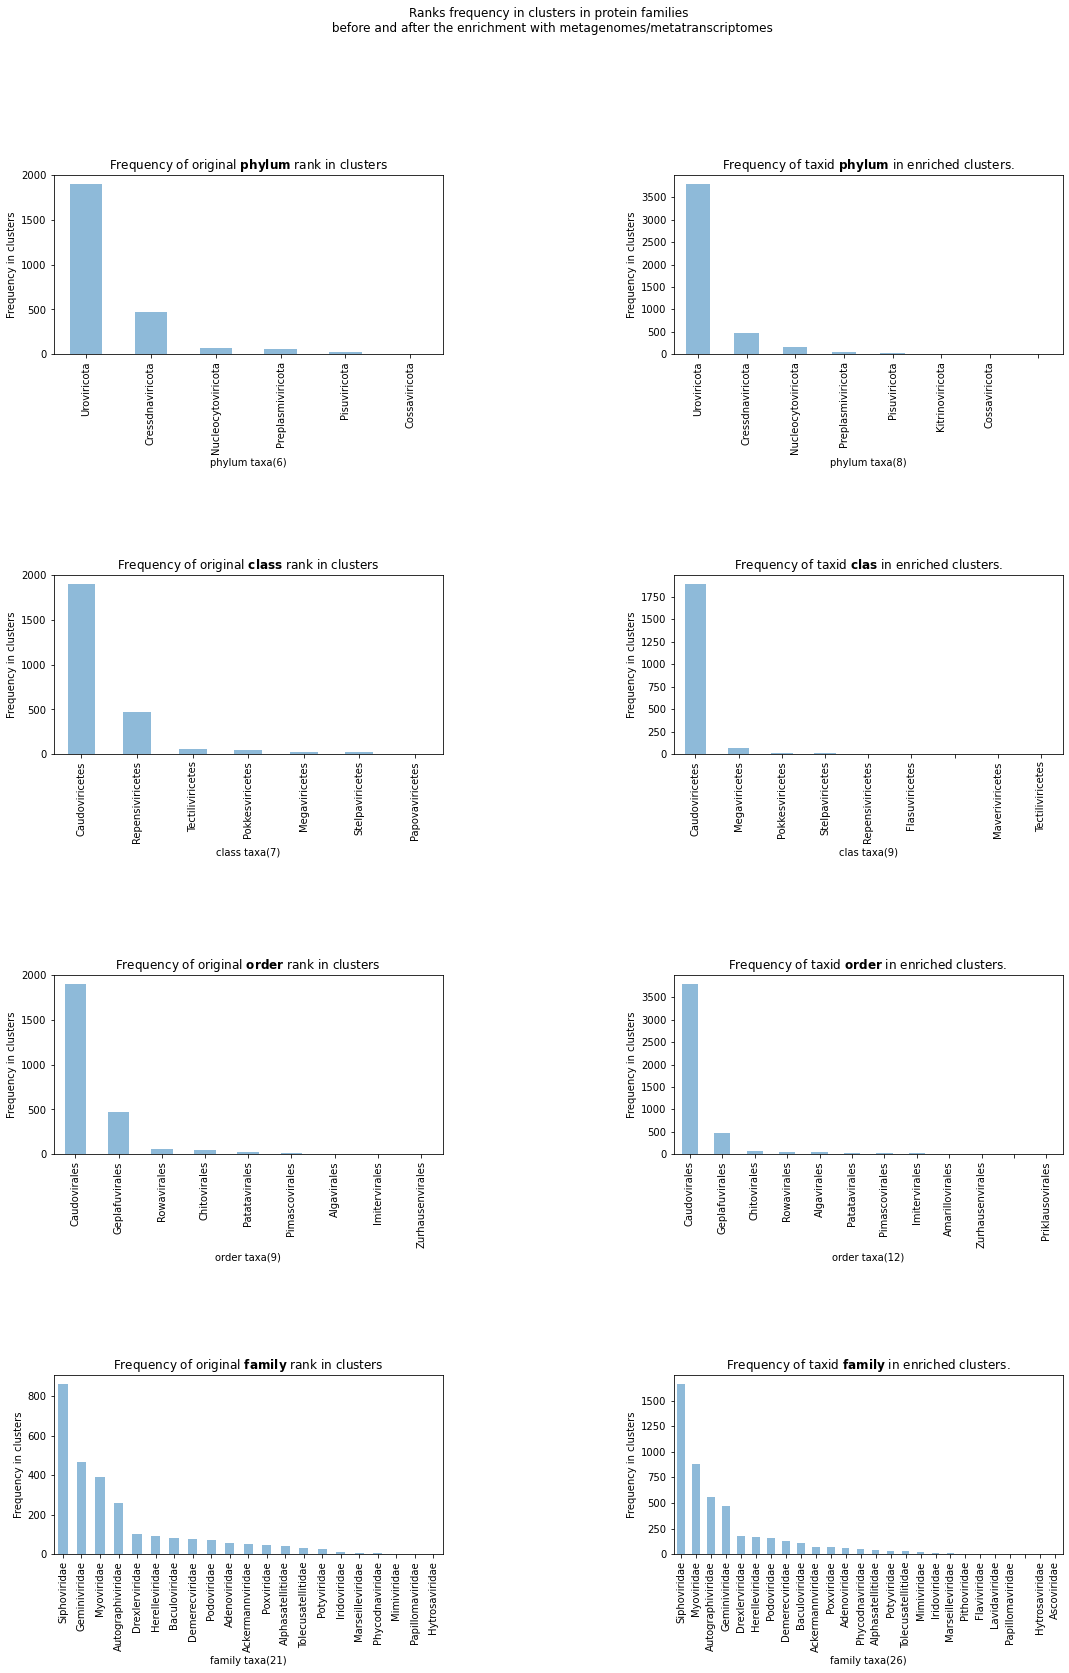

In [24]:
#MAKE A FIG with all the plots together
#for 5 ranks
ax=['None']*10
fig, axs = plt.subplots(4, 2,figsize=(20,25))
fig.suptitle("Ranks frequency in clusters in protein families \n before and after the enrichment with metagenomes/metatranscriptomes")
fig.tight_layout(pad=20.0)
levels=['phylum','class','order','family']
for rows,i in zip(range(4),levels):
    myplot=taxid_list2plot(df,rank=i)
    axs[rows,0]=myplot.plot.bar(ax=axs[rows,0],x='family_rank', y='frequency',alpha=0.5)
    axs[rows,0].get_legend().remove()
    length=len(myplot.index)
    axs[rows,0].set_xlabel('{0} taxa({1})'.format(i,length))
    axs[rows,0].tick_params(axis='x', which='major', labelsize=10)
    axs[rows,0].set_ylabel("Frequency in clusters")
    axs[rows,0].set_title("Frequency of original "+r"$\bf{"+str(i)+"}$"+" rank in clusters")
levels=['phylum','clas','order','family']

for rows,i in zip(range(4),levels):
    less=False
    threshold=20
    #in all ranks except genus we use less=False
    less_families=taxid_list2freq(mytaxids_vir,final_vir_tax,less=False,rank_orig='{0}_original.txt'.format(i),rank=i,threshold=20)
    axs[rows,1]=less_families.plot.bar(ax=axs[rows,1],x='family_rank', y='frequency',alpha=0.5)
    axs[rows,1].get_legend().remove()
    length=len(less_families.index)
    axs[rows,1].set_xlabel('{0} taxa({1})'.format(i,length))
    axs[rows,1].tick_params(axis='x', which='major', labelsize=10)
    axs[rows,1].set_ylabel("Frequency in clusters")
    if less==True:
        axs[rows,1].set_title("Frequency of taxid "+r"$\bf{"+str(i)+"}$"+" in enriched clusters."+'Applied threshold: '+"in over %s families" %threshold)
    else:
         axs[rows,1].set_title("Frequency of taxid "+r"$\bf{"+str(i)+"}$"+" in enriched clusters.")

In [27]:
## THIS SECTION IS THE ABOVE FUNCTION STEP BY STEP
##
## WE CAN CHOOSE WHATEVER TAXONOMY RANK WE LIKE
## px se epipedo family
def taxid_list2rank(taxidlist,rank='family'):
    # we dont use ncbi here since we have the lineage used from mmseqs
    ## we can use whatever rank we want for our plot
    families=[]
    false_taxids=[]
    for taxid in taxidlist:
        level=final_bac_tax.loc[final_bac_tax['taxID']==taxid][rank].tolist()[0]
        if level==0:
            #taxids that do not contain the taxonomy rank 
            false_taxids.append(taxid)
        else:
            families.append(level)
   

    return families, false_taxids

    

In [28]:
#this is not necessary because here we do not need taxids to find the lineage using NCBI
#we took the lineage from mmseqs
families,false_taxids=taxid_list2rank(mytaxids)
for taxid in false_taxids:
    mytaxids.remove(taxid)
#now my taxids contain taxids which have family ranks
len(mytaxids)

13580

In [29]:
#append to metagenome families the enriched families
f=open('families_original.txt','r')
cont=f.read()
orig_fam=cont.split('\n')
f.close()
enriched_families=[]
import itertools
for i in itertools.chain(orig_fam,families):
    enriched_families.append(i)


In [30]:
##now we will count the frequencies for the enriched families
families_frequency=Counter(enriched_families)
families_df=pd.DataFrame.from_dict(families_frequency,orient='index').reset_index()
families_df=families_df.rename(columns={'index':'family_rank',0:'frequency'})
families_df=families_df.sort_values(by=['frequency'],ascending=False)
#because we have 419 unique families we will keep only those with high frequency (in above ten clusters/families )
less_families=families_df.loc[families_df['frequency']>=150]


In [31]:
#the goal is to make a plot where both the original and enriched family ranks are shown
#we don't see any differences in already existing family ranks so we do not make a plot
orig_fams=pd.read_csv("famileis_df.csv",header=0,sep='\t')
comb=families_df.merge(orig_fams,on='family_rank')
comb

,family_rank,frequency_x,frequency_y
0,Siphoviridae,864,864
1,Geminiviridae,469,469
2,Myoviridae,392,392
3,Autographiviridae,260,260
4,Drexlerviridae,102,102
5,Herelleviridae,92,92
6,Baculoviridae,80,80
7,Demerecviridae,76,76
8,Podoviridae,70,70
9,Adenoviridae,57,57


<Figure size 640x480 with 0 Axes>

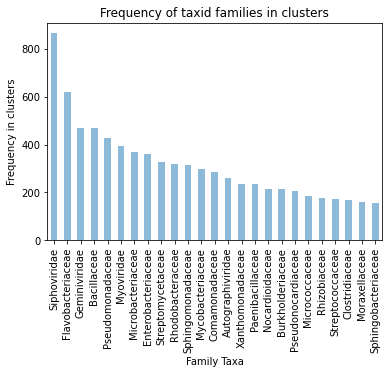

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax1=less_families.plot.bar(x='family_rank', y='frequency',alpha=0.5)
ax1.get_legend().remove()
plt.xlabel("Family Taxa")
plt.ylabel("Frequency in clusters")
plt.title("Frequency of taxid families in clusters")
plt.savefig("FamiliesVsClusters_enriched.png",bbox_inches='tight')
## WARNING: only families that were in above 150 clusters/fams were included

In [ ]:
#######NEXT CODE IS TO MAKE THE NETWORKS#########

In [33]:
# get a threshold lineage for each family
import numpy as np
def threshold_network(datafile=final_vir,threshold=0.5, lineage_level='kingdom'):
    #seperate dataframe by family groups
    groups=datafile.groupby('cluster_family')[lineage_level].apply(list).reset_index()
    #lin=lin.drop(columns=['lineage'])
    rows=len(groups.index)
    for x in range(0,rows):
        list_=groups[lineage_level][x]
        most_freq=[]
        for y in list_:
            per=list_.count(y)/len(list_)
            if y not in most_freq:
                if per>=threshold:
                    most_freq.append(y)
        #update the dataframe
        groups[lineage_level][x]=most_freq
        network1=groups
        lens = [len(item) for item in network1[lineage_level]]
        network=pd.DataFrame( {"cluster_family" : np.repeat(network1['cluster_family'].values,lens), 
                          "lineage_level" : np.concatenate(network1[lineage_level].values)})
    
    return network

In [35]:
#find the unique taxonomic lineage levels in families(>20 members) that exist before enrichment
levels=['family']
#levels=['realm','kingdom','phylum','clas','order','family','subfamily','genus']
network=[None]*8
for i in range(len(levels)):
    network[i]=threshold_network(final_vir,lineage_level=levels[i],threshold=0.05)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in range(len(levels)):
    #length of unique taxnomic labels
    length=len(network[i]['lineage_level'].unique().tolist())
    print(length)

In [ ]:
network

In [48]:
#print the new labels only when there is difference before and after the enrichment
levels2=['order','family','subfamily','genus']

for i in range(len(levels2)):
    #length of unique taxnomic labels
    labels=(network[i+4]['lineage_level'].unique().tolist())
    with open('en_list%d.txt' %i,'w') as f:
        for item in labels:
            f.write("%s\n" %item)


In [ ]:
#save networks in csv files
for i in range(len(levels)):
    network[i].to_csv('network_%s' %levels[i],header=True,index=False,sep='\t')
    


In [36]:
#make the adjacency matrices for all the enriched networks

from itertools import combinations 

#make a function that will transform a network(csv to pandas) into an adjacency matrix/ network input is in the type of a pandas df
def net2am(network):
    #replace taxid level column with 'source' and family member column with 'target' 
    network=network.rename(columns={'lineage_level':"source",'cluster_family':'target'})
    #fill nan values of taxid levels with zeros
    network['source']=network['source'].fillna(0)
    #create a list of how many family members are connected only to one taxid level
    #/ to fill the diagonal of the matrix
    fam_mems=network['source'].value_counts(sort=False,ascending=False,dropna=False).to_list()
    #create a list of unique taxid levels 
    #/ to be the rows and columns of the adj matrix(am)
    taxids=network['source'].value_counts(sort=False,ascending=False,dropna=False).index.to_list()
    #create the layout of the am
    am = pd.DataFrame(np.zeros(shape=(len(taxids),len(taxids))), columns=taxids, index=taxids)
    np.fill_diagonal(am.values, fam_mems)
    #create a list of 'target' that will show the connections of the network
    #store the double connections in the dubl list
    list1=network['target'].to_list()
    ten, nine, eight, sev,six,fiv,four,thr,two = ([] for i in range(9))
    
    for i in range(1,len(list1)+1):
        if list1.count(i)==10:
            ten.append(i)
            continue
        if list1.count(i)==9:
            nine.append(i)
            continue
        if list1.count(i)==8:
            eight.append(i)
            continue
        if list1.count(i)==7:
            sev.append(i)
            continue
        if list1.count(i)==6:
            six.append(i)
            continue
        if list1.count(i)==5:
            fiv.append(i)
            continue
        if list1.count(i)==4:
            four.append(i)
            continue
        if list1.count(i)==3:
            thr.append(i)
            continue
        if list1.count(i)==2:
            two.append(i)
            continue
    #for all the connections append in the adjacency matrix
    #kanto me ton paradosiako tropo
    for listt in ten, nine, eight,sev,six,fiv,four,thr,two:
        for connection in listt:
            cel=network[network['target']==connection]['source'].to_list()
            for combo in combinations(cel, 2):  # 2 for pairs
                am.at[combo[0],combo[1]]+=1
                #make the matrix symmetric
                am.at[combo[1],combo[0]]+=1

    #show the final adjacency matrix, hurrayy
    return am

In [37]:
#the adjacency matrices for the enriched networks
am=[None]*8
for i in range(len(levels)):
    am[i]=net2am(network[i])

In [ ]:
#make a family vs cluster plot for the enriched protein domains
#according to mmseqs result
#make a function to be better

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table # EDIT: see deprecation warnings below
for i in range(len(levels)):
    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis

    table(ax, am[i])  # where df is your data frame

    plt.savefig('mytable_%s.png' %i,bbox_inches='tight')

In [38]:
am[0]

,Herelleviridae,Podoviridae,Adenoviridae,Baculoviridae,Siphoviridae,Mimiviridae,Phycodnaviridae,Potyviridae,Myoviridae,Marseilleviridae,Autographiviridae,Poxviridae,Iridoviridae,nan,Demerecviridae,Geminiviridae,Drexlerviridae,Ackermannviridae
Herelleviridae,17.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Podoviridae,1.0,31.0,0.0,0.0,10.0,0.0,0.0,0.0,12.0,0.0,2.0,0.0,0.0,4.0,4.0,0.0,4.0,1.0
Adenoviridae,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baculoviridae,0.0,0.0,0.0,11.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Siphoviridae,3.0,10.0,0.0,0.0,319.0,0.0,0.0,0.0,17.0,0.0,4.0,0.0,0.0,8.0,4.0,0.0,4.0,1.0
Mimiviridae,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phycodnaviridae,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Potyviridae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Myoviridae,6.0,12.0,0.0,0.0,17.0,0.0,0.0,0.0,350.0,0.0,6.0,0.0,0.0,6.0,10.0,0.0,4.0,2.0
Marseilleviridae,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
